In [1]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I relied heavily on this article: https://medium.com/analytics-vidhya/web-scraping-wiki-tables-using-beautifulsoup-and-python-6b9ea26d8722

### First, I'm going to read in my 'gun deaths by state' csv file as a Pandas dataframe.

In [2]:
gd = pd.read_csv('gd_state.csv')

### Now I'm going to start scraping Wikipedia for additional information. I'll start with a table of US states by population.

In [3]:
url = requests.get('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population').text

In [4]:
soup = bs(url,'lxml')

In [5]:
table = soup.find('table',{'class':'wikitable sortable'})

In [6]:
table_df = pd.read_html(str(table),header=0)

In [7]:
table_df = table_df[0]

In [8]:
table_df = table_df[['State or territory', 'Population estimate, July 1, 2016[1]']]

In [9]:
table_df.rename(columns={'State or territory':'state',
                           'Population estimate, July 1, 2016[1]':'population'}, inplace=True)

In [10]:
table_df.set_index('state', inplace=True)

In [11]:
table_df.drop(['Guam', 'Puerto Rico', 'U.S. Virgin Islands', 'American Samoa', 'Northern Mariana Islands',
              'Wake Island', 'Johnston Atoll', 'Midway Atoll', 'Palmyra Atoll', 
              'Contiguous United States', 'The fifty states', 'Fifty states + D.C.',
              'Total U.S. territory'], inplace=True)

### Now I'm going to read in a .txt file I downloaded from Kaggle that lists each state's Gini coefficient.

In [12]:
gini_states = pd.read_csv('gini_states.txt', sep='\t', index_col=0)

In [13]:
gini_states.set_index('State', inplace=True)

In [14]:
table_df.sort_index(inplace=True)
gini_states.sort_index(inplace=True)

## Merging dataframes:

In [15]:
states = pd.merge(table_df, gini_states, left_index=True, right_index=True)
 

In [16]:
gd.set_index('state', inplace=True)

In [17]:
states = pd.merge(states, gd, left_index=True, right_index=True)

In [18]:
states.head()

,population,Gini Coefficient,n_killed
state,,,
Alabama,4863300,0.472,5471
Alaska,741894,0.422,1349
Arizona,6931071,0.455,2328
Arkansas,2988248,0.458,2842
California,39250017,0.471,16306


In [19]:
states['pc_killed'] = states.n_killed / states.population

In [20]:
states.head()

,population,Gini Coefficient,n_killed,pc_killed
state,,,,
Alabama,4863300,0.472,5471,0.001125
Alaska,741894,0.422,1349,0.001818
Arizona,6931071,0.455,2328,0.000336
Arkansas,2988248,0.458,2842,0.000951
California,39250017,0.471,16306,0.000415


In [21]:
states.rename(columns={'Gini Coefficient': 'gini'}, inplace=True)

In [22]:
states.sort_values('gini')

,population,gini,n_killed,pc_killed
state,,,,
Utah,3051217,0.419,1072,0.000351
Alaska,741894,0.422,1349,0.001818
Wyoming,585501,0.423,494,0.000844
New Hampshire,1334795,0.425,964,0.000722
Iowa,3134693,0.427,2517,0.000803
Wisconsin,5778708,0.430,4787,0.000828
Nebraska,1907116,0.432,1651,0.000866
Idaho,1683140,0.433,661,0.000393
Hawaii,1428557,0.433,289,0.000202


In [23]:
gini_pc_killed = states[['gini', 'pc_killed']]

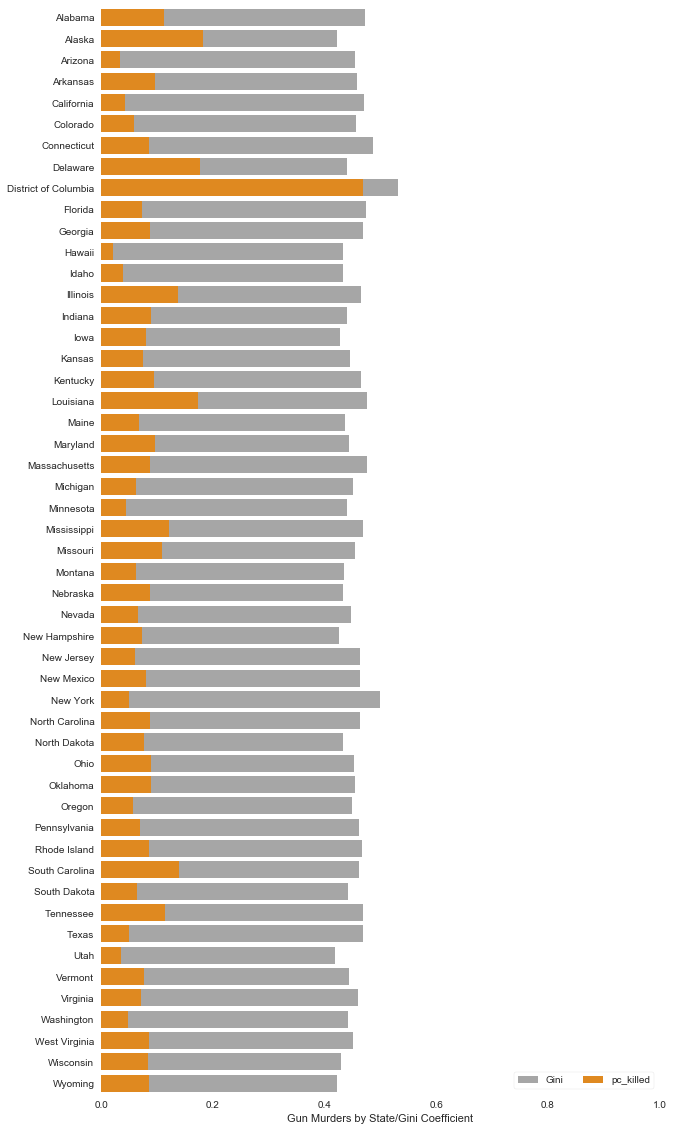

In [24]:
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 20))

sns.barplot(x="gini", y=gini_pc_killed.index, data=gini_pc_killed,
            label="Gini", color="grey", alpha=.7)

sns.barplot(x=([i*100 for i in gini_pc_killed.pc_killed]), y=gini_pc_killed.index, data=gini_pc_killed,
            label="pc_killed", color="darkorange", alpha=1)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Gun Murders by State/Gini Coefficient")
sns.despine(left=True, bottom=True)

#f = plt.figure(figsize=(12,8))
#plt.barh(gini_pc_killed)

In [25]:
gini_pc_killed.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [26]:
gini_pc_killed.sort_values('pc_killed', ascending=False).index

Index(['District of Columbia', 'Alaska', 'Delaware', 'Louisiana',
       'South Carolina', 'Illinois', 'Mississippi', 'Tennessee', 'Alabama',
       'Missouri', 'Maryland', 'Arkansas', 'Kentucky', 'Indiana', 'Ohio',
       'Oklahoma', 'Massachusetts', 'Nebraska', 'Georgia', 'North Carolina',
       'West Virginia', 'Connecticut', 'Rhode Island', 'Wyoming', 'Wisconsin',
       'Iowa', 'New Mexico', 'North Dakota', 'Vermont', 'Kansas', 'Florida',
       'New Hampshire', 'Virginia', 'Pennsylvania', 'Maine', 'Nevada',
       'South Dakota', 'Michigan', 'Montana', 'New Jersey', 'Colorado',
       'Oregon', 'New York', 'Texas', 'Washington', 'Minnesota', 'California',
       'Idaho', 'Utah', 'Arizona', 'Hawaii'],
      dtype='object', name='state')

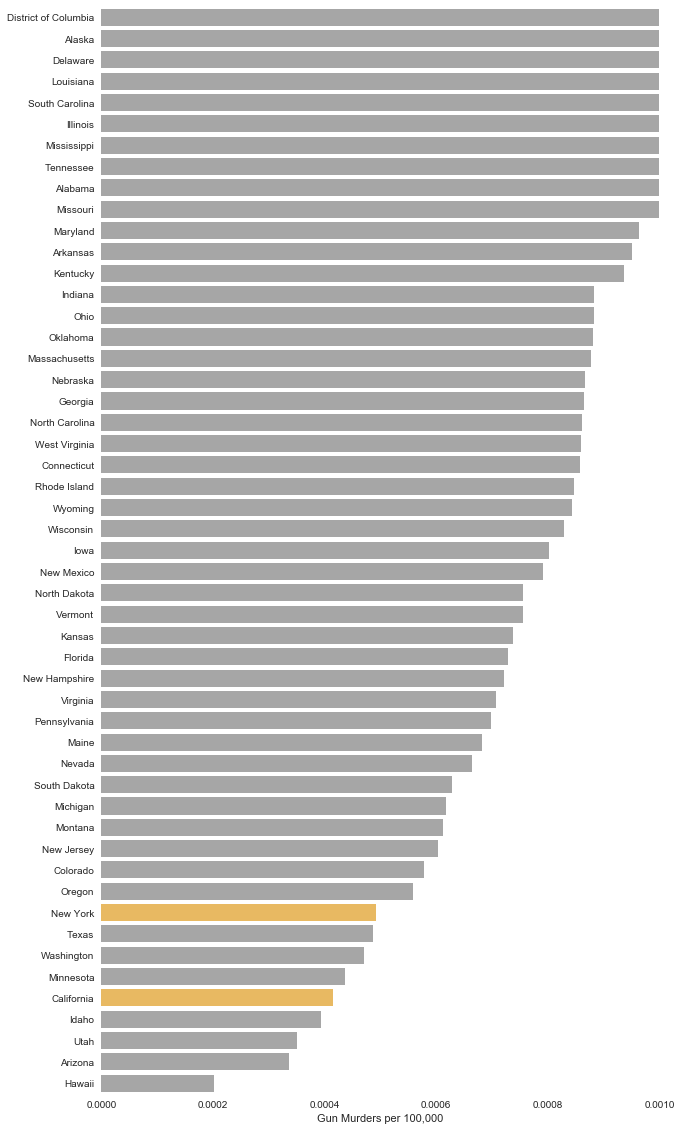

In [27]:
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 20))

colors = ['orange' if (x=='California' or x== 'New York') else 'grey' for x in gini_pc_killed.sort_values('pc_killed', ascending=False).index]
sns.barplot(x=(gini_pc_killed.pc_killed.sort_values(ascending=False)), 
            y=gini_pc_killed.sort_values('pc_killed', ascending=False).index, 
            data=gini_pc_killed,
            label="pc_killed", palette=colors, alpha=.7)

ax.set(xlim=(0, .001), ylabel="",
       xlabel="Gun Murders per 100,000")
sns.despine(left=True, bottom=True)

#f = plt.figure(figsize=(1,8))
#plt.barh(gini_pc_killed)

## Seeking a global perspective:

### I want to get a sense of how the US compares with other countries around the world in terms of gun violence. To do this, I'll scrape some more tables from Wikipedia, then merge and plot them accordingly.

In [28]:
url2 = requests.get('https://en.wikipedia.org/wiki/Gun_ownership').text

soup2 = bs(url2,'lxml')

table2 = soup2.find('table',{'class':'wikitable sortable'})

table_df2 = pd.read_html(str(table2),header=1)

In [29]:
table_df2=table_df2[0]

In [30]:
table_df2.head()

,Countries & Territories,Estimate of firearms in civilian possession,Population 2017,Estimate of civilian firearms per 100 persons
0,Afghanistan,4270000,34169000,12.5
1,Albania,350000,2911000,12.0
2,Algeria,877000,41064000,2.1
3,American Samoa,400,56000,0.7
4,Andorra,10000,69000,14.1


In [31]:
table_df2.rename(columns={'Countries & Territories': 'country',
                          'Estimate of firearms in civilian possession':'guns',
                          'Population 2017': 'population',
                          'Estimate of civilian firearms per 100 persons': 'guns_per_100'}, inplace=True)

In [32]:
table_df2.set_index('country', inplace=True)

In [33]:
guns_per_cap = table_df2[['guns_per_100']]

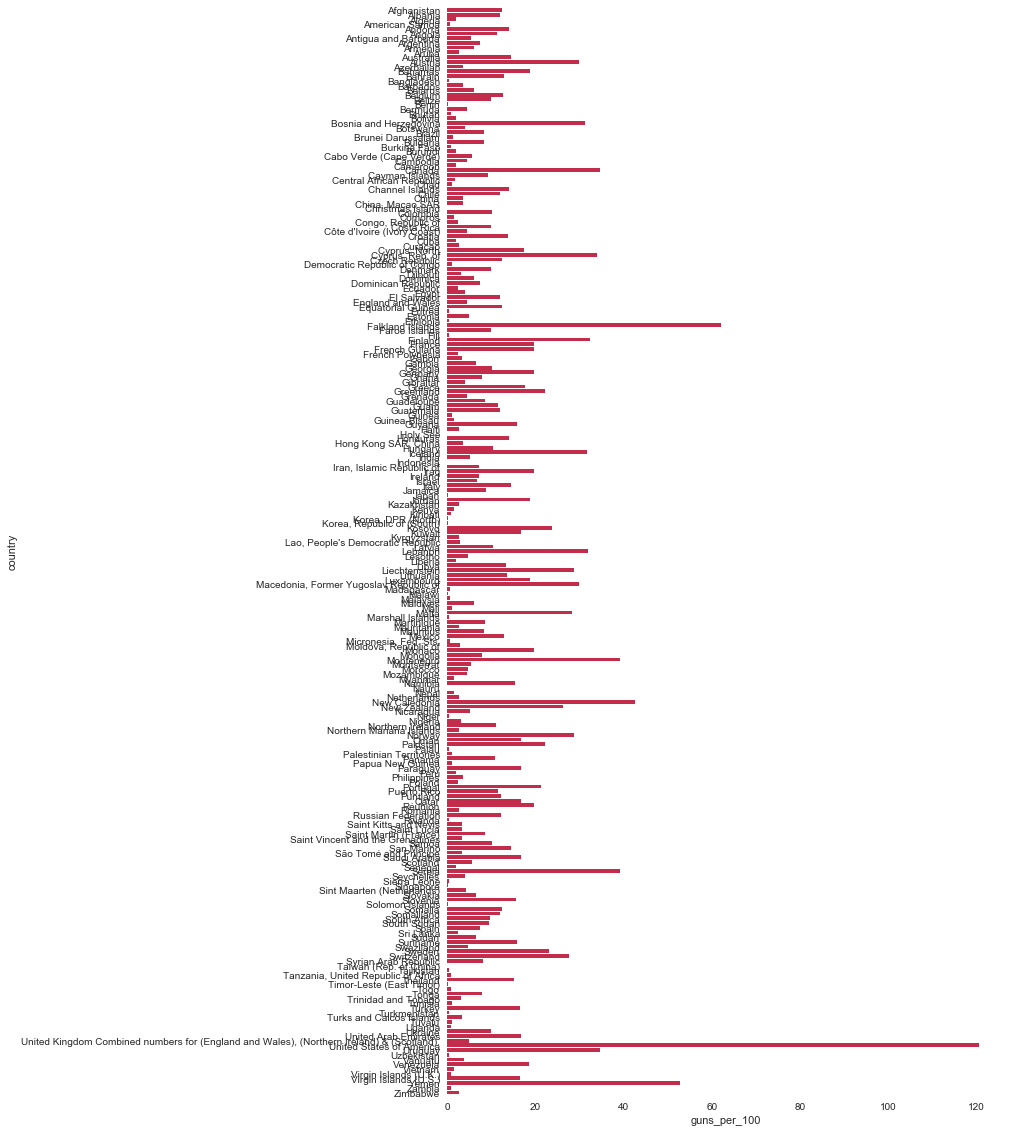

In [34]:
f, ax = plt.subplots(figsize=(10, 20))

sns.barplot(x="guns_per_100", y=guns_per_cap.index, data=guns_per_cap,
            color="crimson")
ylabel="",
xlabel="Per Capita Gun Ownership by Country"
sns.despine(left=True, bottom=True)

### Yikes... this plot is cmpletely unreadable. However, if I drop about 75% of the countries, focusing solely on Western nations and other nations w/ similar gun violence to the US, I think it might be farily informative.

In [35]:
url3 = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_firearm-related_death_rate').text
soup3 = bs(url3,'lxml')
table3 = soup3.find('table',{'class':'wikitable sortable'})
table_df3 = pd.read_html(str(table3),header=0)

In [36]:
table_df3 = table_df3[0]

In [37]:
table_df3

,Country,Year,Total,Homicides,Suicides,Unintentional,Undetermined,Guns per 100 inhabitants,Sources and notes
0,Argentina,2014,6.93,3.07,1.20,0.08,2.57,8.8 (2010),Guns in Argentina[1]
1,Australia,2016,1.04,0.18,0.8,0.02,0.01,13.70,Guns in Australia[2]
2,Austria,2014,2.9,0.12,2.69,0.02,0.09,30.4 (2007?),Guns in Austria[3]
3,Azerbaijan,2007,0.07,0.27 (2010),0.01,0.02,?,3.5,Guns in Azerbaijan[4]
4,Barbados,2011,6.6,3.12 (2013),?,0.35,4.88,3.5 (2007),Guns in Barbados[5]
5,Belarus,mixed years,?,0.14 (2009),?,?,?,7.3 (2007),Guns in Belarus[6]
6,Belgium,2013,1.24,0.14,1.03,0.01,0.05,6.86 (2015),Guns in Belgium[7]
7,Bolivia,mixed years,?,0.74 (2010),?,?,?,2.5 (2012),Guns in Bolivia[8]
8,Brazil,2012,21.9,20.7,0.5,0.1,0.5,8.6,Guns in Brazil[9]
9,Bulgaria,2013,1.73,0.34,1.0,0.23,0.15,"6.2-19.4 (2007, 2006)",Guns in Bulgaria[10]


In [38]:
table_df3.set_index('Country', inplace=True)

In [39]:
table_df3.head()

,Year,Total,Homicides,Suicides,Unintentional,Undetermined,Guns per 100 inhabitants,Sources and notes
Country,,,,,,,,
Argentina,2014,6.93,3.07,1.20,0.08,2.57,8.8 (2010),Guns in Argentina[1]
Australia,2016,1.04,0.18,0.8,0.02,0.01,13.70,Guns in Australia[2]
Austria,2014,2.9,0.12,2.69,0.02,0.09,30.4 (2007?),Guns in Austria[3]
Azerbaijan,2007,0.07,0.27 (2010),0.01,0.02,?,3.5,Guns in Azerbaijan[4]
Barbados,2011,6.6,3.12 (2013),?,0.35,4.88,3.5 (2007),Guns in Barbados[5]


In [40]:
table_df3.sort_values('Suicides', ascending=False)

,Year,Total,Homicides,Suicides,Unintentional,Undetermined,Guns per 100 inhabitants,Sources and notes
Country,,,,,,,,
Country,Year,Total,Homicides,Suicides,Unintentional,Undetermined,Guns per 100 inhabitants,Sources and notes
Bolivia,mixed years,?,0.74 (2010),?,?,?,2.5 (2012),Guns in Bolivia[8]
Philippines,?,8.90,8.90 (2003),?,?,?,4.7,Guns in Philippines[57]
Qatar,?,0.15,0.15 (2004),?,?,?,19.2,Guns in Qatar[60]
Ukraine,2016,1.36,1.36 (2016),?,?,NaN,6.6,Guns in Ukraine[76]
Swaziland,?,37.16,37.16 (2004),?,?,?,6.4,Guns in Swaziland[69]
Belarus,mixed years,?,0.14 (2009),?,?,?,7.3 (2007),Guns in Belarus[6]
Barbados,2011,6.6,3.12 (2013),?,0.35,4.88,3.5 (2007),Guns in Barbados[5]
United States,2016,11.96,4.62,7.10,0.15,0.09,89,Guns in United States[79]


In [41]:
table_df3.drop(['Year', 'Sources and notes'], axis=1, inplace=True)

In [42]:
table_df3.head()

,Total,Homicides,Suicides,Unintentional,Undetermined,Guns per 100 inhabitants
Country,,,,,,
Argentina,6.93,3.07,1.20,0.08,2.57,8.8 (2010)
Australia,1.04,0.18,0.8,0.02,0.01,13.70
Austria,2.9,0.12,2.69,0.02,0.09,30.4 (2007?)
Azerbaijan,0.07,0.27 (2010),0.01,0.02,?,3.5
Barbados,6.6,3.12 (2013),?,0.35,4.88,3.5 (2007)


In [43]:
len(table_df2)

231

In [44]:
global_gd = pd.merge(table_df2, table_df3, left_index=True, right_index=True)

In [45]:
len(global_gd)

67

In [46]:
global_gd

,guns,population,guns_per_100,Total,Homicides,Suicides,Unintentional,Undetermined,Guns per 100 inhabitants
Argentina,3256000,44272000,7.4,6.93,3.07,1.20,0.08,2.57,8.8 (2010)
Australia,3573000,24642000,14.5,1.04,0.18,0.8,0.02,0.01,13.70
Austria,2577000,8592000,30.0,2.9,0.12,2.69,0.02,0.09,30.4 (2007?)
Azerbaijan,362000,9974000,3.6,0.07,0.27 (2010),0.01,0.02,?,3.5
Barbados,10000,286000,3.5,6.6,3.12 (2013),?,0.35,4.88,3.5 (2007)
Belarus,581000,9459000,6.1,?,0.14 (2009),?,?,?,7.3 (2007)
Belgium,1451000,11444000,12.7,1.24,0.14,1.03,0.01,0.05,6.86 (2015)
Bolivia,218000,11053000,2.0,?,0.74 (2010),?,?,?,2.5 (2012)
Brazil,17510000,211243000,8.3,21.9,20.7,0.5,0.1,0.5,8.6
Bulgaria,590000,7045000,8.4,1.73,0.34,1.0,0.23,0.15,"6.2-19.4 (2007, 2006)"


### I need to do some data cleaning... namely, I should remove one of the 'guns per capita' columns. However, they contain different values, so I first need to figure out which set of numbers is more accurate. I also need to drop countries that are immaterial to the scope of my problem statement as well as those that contain a great deal of missing values.